In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from plot.acf_plot import return_params
import seaborn as sns

In [2]:
resdict_con_s2prop = pickle.load(open( "Resultdicts_2_static2_9.0_consensus_noPB_changeprop.p", "rb" ))
resdict_vb_s2prop = pickle.load(open( "Resultdicts_2_static2_9.0_vbHMM+GMM_noPB_changeprop.p", "rb" ))

In [3]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(74/256, 189/256,  N)
vals[:, 1] = np.linspace(98/256, 65/256, N)
vals[:, 2] = np.linspace(189/256, 65/256,  N)
vals[:, 3] *= 1
newcmp = ListedColormap(vals)

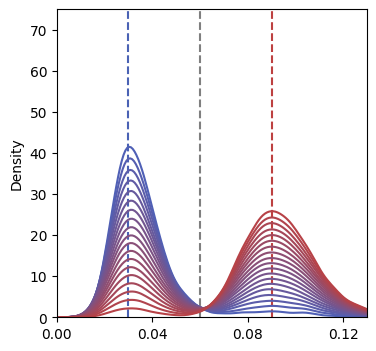

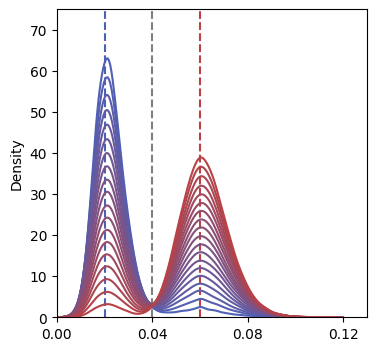

In [4]:
#VBFRET KDE
tmatrixs_vb_s2prop = {}
tmatrixs_vb_ind_s2prop_01 = {}
tmatrixs_vb_ind_s2prop_10 = {}

for j in resdict_vb_s2prop.keys():
    tmatrixs_vb_s2prop[j] = []
    tmatrixs_vb_ind_s2prop_01[j] = []
    tmatrixs_vb_ind_s2prop_10[j] = []
    for i in resdict_vb_s2prop[j]:
        tmatrixs_vb_s2prop[j].append(i.tmstar)
        for k in i.vb_tmatrices:
            tms = k.copy()
            for q in range(k.shape[0]):
                tms[q] /= tms[q].sum()
            tmatrixs_vb_ind_s2prop_01[j].append(tms[0,1])
            tmatrixs_vb_ind_s2prop_10[j].append(tms[1,0])
    tmatrixs_vb_s2prop[j] = np.array(tmatrixs_vb_s2prop[j])
                
plt.figure(figsize=(4,4))
plt.axvline(x = 0.09, ls = '--',color ='#bd4141ff')
plt.axvline(x = 0.06, ls = '--',color ='k',alpha=0.5)
plt.axvline(x = 0.03, ls = '--',color ='#4a62b4ff')
for j in tmatrixs_vb_ind_s2prop_10.keys():
    sns.kdeplot(data=tmatrixs_vb_ind_s2prop_10[j],color =newcmp(j), ls = '-',label = str(j))
plt.xticks(np.arange(0.00, 0.13, step=0.04))
plt.xlim(0,.13)
plt.ylim(0.00,75)
plt.savefig('Figures/static/vb_ind_p01.pdf')
plt.show()

plt.figure(figsize=(4,4))
plt.axvline(x = 0.06, ls = '--',color ='#bd4141ff')
plt.axvline(x = 0.04, ls = '--',color ='k',alpha=0.5)
plt.axvline(x = 0.02, ls = '--',color ='#4a62b4ff')
for j in resdict_con_s2prop.keys():
    sns.kdeplot(data=tmatrixs_vb_ind_s2prop_01[j],color =newcmp(j), ls = '-',label = str(j))
plt.xticks(np.arange(0.00, 0.13, step=0.04))
plt.xlim(0,.13)
plt.ylim(0.00,75)
plt.savefig('Figures/static/vb_ind_p10.pdf')
plt.show()

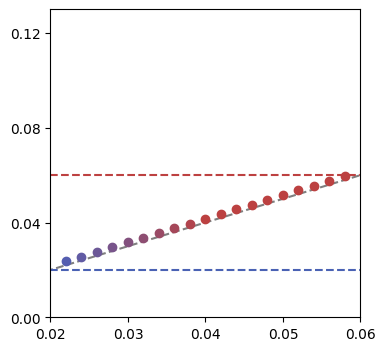

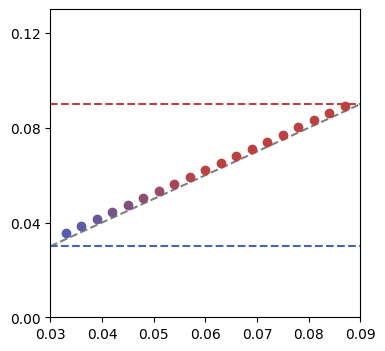

In [5]:
#VBFRET II
plt.figure(figsize=(4,4))
for j in tmatrixs_vb_s2prop.keys():
    #plt.errorbar(x = 0.02 + j*0.04, y = np.mean(tmatrixs_vb_s2prop[j][:,0,1]), yerr = np.std(tmatrixs_vb_s2prop[j][:,0,1]),
    #             fmt='o', color = newcmp(j*2), ecolor = 'k', capsize = 2)
    plt.errorbar(x = 0.02 + j*0.04, y = np.mean(tmatrixs_vb_s2prop[j][:,0,1]), yerr = np.std(tmatrixs_vb_s2prop[j][:,0,1]),
                 fmt='o', color = newcmp(j*2), ecolor = 'k', capsize = 2)

plt.plot(np.linspace(0.018,0.062),np.linspace(0.018,0.062), 'k--', alpha = 0.5)
plt.axhline(y = 0.06, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.02, ls = '--',color ='#4a62b4ff')

plt.xticks(np.arange(0.02, 0.07, step=0.01))
plt.xlim(0.02,0.06)
plt.yticks(np.arange(0.00, 0.13, step=0.04))
plt.ylim(0,.13)
plt.savefig('Figures/static/vb_comp_p01.pdf')

plt.figure(figsize=(4,4))
for j in tmatrixs_vb_s2prop.keys():
    #plt.errorbar(x = 0.02 + j*0.04, y = np.mean(tmatrixs_vb_s2prop[j][:,0,1]), yerr = np.std(tmatrixs_vb_s2prop[j][:,0,1]),
    #             fmt='o', color = newcmp(j*2), ecolor = 'k', capsize = 2)
    plt.errorbar(x = 0.03 + j*0.06, y = np.mean(tmatrixs_vb_s2prop[j][:,1,0]), yerr = np.std(tmatrixs_vb_s2prop[j][:,0,1]),
                 fmt='o', color = newcmp(j*2), ecolor = 'k', capsize = 2)

plt.plot(np.linspace(0.028,0.092),np.linspace(0.028,0.092), 'k--', alpha = 0.5)
plt.axhline(y = 0.09, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.03, ls = '--',color ='#4a62b4ff')

plt.xticks(np.arange(0.03, 0.10, step=0.01))
plt.xlim(0.03,0.09)
plt.yticks(np.arange(0.00, 0.13, step=0.04))
plt.ylim(0,.13)
plt.savefig('Figures/static/vb_comp_p10.pdf')

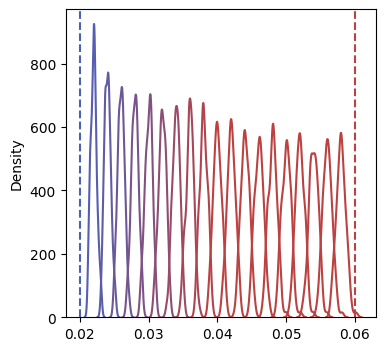

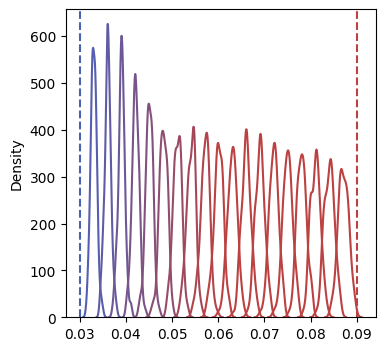

In [6]:
#CONSENSUS I
tmatrixs_con_s2prop = {}
plt.figure(figsize=(4,4))
plt.axvline(x = 0.06, ls = '--',color ='#bd4141ff')
plt.axvline(x = 0.02, ls = '--',color ='#4a62b4ff')
for j in resdict_con_s2prop.keys():
    tmatrixs_con_s2prop[j] = []
    for i in resdict_con_s2prop[j]:
        #if i.tmstar[0,1] > 0.005 and i.tmstar[1,0] > 0.01:
        tmatrixs_con_s2prop[j].append(i.tmstar)
    
    tmatrixs_con_s2prop[j] = np.array(tmatrixs_con_s2prop[j])
    sns.kdeplot(data=tmatrixs_con_s2prop[j][:,0,1],color =newcmp(j*2), ls = '-',label = str(j))
    #sns.kdeplot(data=tmatrixs_vb_d[j][:,0,1],color ='k')
#plt.ylim(0.00,1000)
#plt.legend()
#plt.savefig('tm01_s2_hist_con2_changeprop.pdf')
plt.show()


plt.figure(figsize=(4,4))
plt.axvline(x = 0.09, ls = '--',color ='#bd4141ff')
plt.axvline(x = 0.03, ls = '--',color ='#4a62b4ff')
for j in resdict_con_s2prop.keys():
    sns.kdeplot(data=tmatrixs_con_s2prop[j][:,1,0],color =newcmp(j*2), ls = '-',label = str(j))
    #sns.kdeplot(data=tmatrixs_vb_d[j][:,0,1],color ='k')
#plt.ylim(0.00,1000)
#plt.legend()
#plt.savefig('tm10_s2_hist_con2_changeprop.pdf')
plt.show()

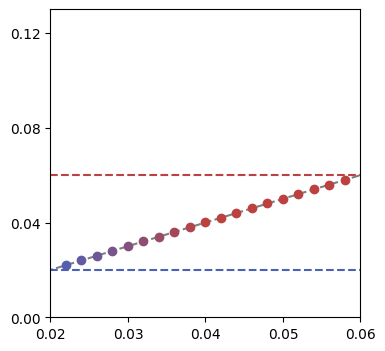

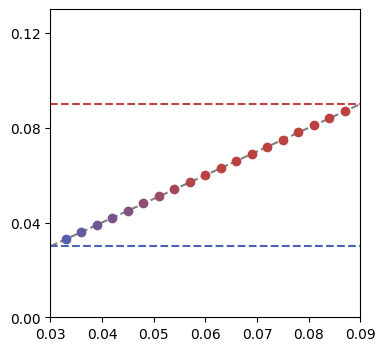

In [7]:
#CONSENSUS II
plt.figure(figsize=(4,4))
for j in tmatrixs_con_s2prop.keys():
    #plt.errorbar(x = 0.02 + j*0.04, y = np.mean(tmatrixs_vb_s2prop[j][:,0,1]), yerr = np.std(tmatrixs_vb_s2prop[j][:,0,1]),
    #             fmt='o', color = newcmp(j*2), ecolor = 'k', capsize = 2)
    plt.errorbar(x = 0.02 + j*0.04, y = np.mean(tmatrixs_con_s2prop[j][:,0,1]), yerr = np.std(tmatrixs_con_s2prop[j][:,0,1]),
                 fmt='o', color = newcmp(j*2), ecolor = 'k', capsize = 2)

plt.plot(np.linspace(0.018,0.062),np.linspace(0.018,0.062), 'k--', alpha = 0.5)
plt.axhline(y = 0.06, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.02, ls = '--',color ='#4a62b4ff')

plt.xticks(np.arange(0.02, 0.07, step=0.01))
plt.xlim(0.02,0.06)
plt.yticks(np.arange(0.00, 0.13, step=0.04))
plt.ylim(0,.13)
plt.savefig('Figures/static/con_p01.pdf')

plt.figure(figsize=(4,4))
for j in tmatrixs_con_s2prop.keys():
    #plt.errorbar(x = 0.02 + j*0.04, y = np.mean(tmatrixs_vb_s2prop[j][:,0,1]), yerr = np.std(tmatrixs_vb_s2prop[j][:,0,1]),
    #             fmt='o', color = newcmp(j*2), ecolor = 'k', capsize = 2)
    plt.errorbar(x = 0.03 + j*0.06, y = np.mean(tmatrixs_con_s2prop[j][:,1,0]), yerr = np.std(tmatrixs_con_s2prop[j][:,0,1]),
                 fmt='o', color = newcmp(j*2), ecolor = 'k', capsize = 2)

plt.plot(np.linspace(0.028,0.092),np.linspace(0.028,0.092), 'k--', alpha = 0.5)
plt.axhline(y = 0.09, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.03, ls = '--',color ='#4a62b4ff')

plt.xticks(np.arange(0.03, 0.10, step=0.01))
plt.xlim(0.03,0.09)
plt.yticks(np.arange(0.00, 0.13, step=0.04))
plt.ylim(0,.13)
plt.savefig('Figures/static/con_p10.pdf')

In [8]:
res_h_s2prop05 = pickle.load(open( "Results_new3_2_static2prop5_9.0_h_NoPB.p", "rb" ))
res_h_s2prop10 = pickle.load(open( "Results_new3_2_static2prop10_9.0_h_NoPB.p", "rb" ))
res_h_s2prop15 = pickle.load(open( "Results_new3_2_static2prop15_9.0_h_NoPB.p", "rb" ))
res_h_s2prop20 = pickle.load(open( "Results_new3_2_static2prop20_9.0_h_NoPB.p", "rb" ))
res_h_s2prop25 = pickle.load(open( "Results_new3_2_static2prop25_9.0_h_NoPB.p", "rb" ))
res_h_s2prop30 = pickle.load(open( "Results_new3_2_static2prop30_9.0_h_NoPB.p", "rb" ))
res_h_s2prop35 = pickle.load(open( "Results_new3_2_static2prop35_9.0_h_NoPB.p", "rb" ))
res_h_s2prop40 = pickle.load(open( "Results_new3_2_static2prop40_9.0_h_NoPB.p", "rb" ))
res_h_s2prop45 = pickle.load(open( "Results_new3_2_static2prop45_9.0_h_NoPB.p", "rb" ))
res_h_s2prop50 = pickle.load(open( "Results_new3_2_static2prop50_9.0_h_NoPB.p", "rb" ))
res_h_s2prop55 = pickle.load(open( "Results_new3_2_static2prop55_9.0_h_NoPB.p", "rb" ))
res_h_s2prop60 = pickle.load(open( "Results_new3_2_static2prop60_9.0_h_NoPB.p", "rb" ))
res_h_s2prop65 = pickle.load(open( "Results_new3_2_static2prop65_9.0_h_NoPB.p", "rb" ))
res_h_s2prop70 = pickle.load(open( "Results_new3_2_static2prop70_9.0_h_NoPB.p", "rb" ))
res_h_s2prop75 = pickle.load(open( "Results_new3_2_static2prop75_9.0_h_NoPB.p", "rb" ))
res_h_s2prop80 = pickle.load(open( "Results_new3_2_static2prop80_9.0_h_NoPB.p", "rb" ))
res_h_s2prop85 = pickle.load(open( "Results_new3_2_static2prop85_9.0_h_NoPB.p", "rb" ))
res_h_s2prop90 = pickle.load(open( "Results_new3_2_static2prop90_9.0_h_NoPB.p", "rb" ))
res_h_s2prop95 = pickle.load(open( "Results_new3_2_static2prop95_9.0_h_NoPB.p", "rb" ))

res_h_s2prop = {}
res_h_s2prop[0.05] = res_h_s2prop05
res_h_s2prop[0.10] = res_h_s2prop10
res_h_s2prop[0.15] = res_h_s2prop15
res_h_s2prop[0.20] = res_h_s2prop20
res_h_s2prop[0.25] = res_h_s2prop25
res_h_s2prop[0.30] = res_h_s2prop30
res_h_s2prop[0.35] = res_h_s2prop35
res_h_s2prop[0.40] = res_h_s2prop40
res_h_s2prop[0.45] = res_h_s2prop45
res_h_s2prop[0.50] = res_h_s2prop50
res_h_s2prop[0.55] = res_h_s2prop55
res_h_s2prop[0.60] = res_h_s2prop60
res_h_s2prop[0.65] = res_h_s2prop65
res_h_s2prop[0.70] = res_h_s2prop70
res_h_s2prop[0.75] = res_h_s2prop75
res_h_s2prop[0.80] = res_h_s2prop80
res_h_s2prop[0.85] = res_h_s2prop85
res_h_s2prop[0.90] = res_h_s2prop90
res_h_s2prop[0.95] = res_h_s2prop95


In [9]:
def gen_flat_tm(h_tm, exit, pi, case):
    #transposing hfret tmatrix
    new_tm = []
    for level in h_tm:
        new_level = []
        for tm in level:
            newt = tm.T.copy()
            new_level.append(newt)
        new_tm.append(new_level)
        
    #defining all terms
    pi_2_0 = pi[0][0][0][0]
    pi_2_1 = pi[0][0][0][1]
    pi_3_0 = pi[1][0][0][0]
    pi_3_1 = pi[1][0][0][1]
    pi_3_2 = pi[1][1][0][0]
    pi_3_3 = pi[1][1][0][1]

    E_2_0 = exit[0][0][0]
    E_2_1 = exit[0][0][1]
    E_3_0 = exit[1][0][0]
    E_3_1 = exit[1][0][1]
    E_3_2 = exit[1][1][0]
    E_3_3 = exit[1][1][1]

    A_2_00 = new_tm[0][0][0][0]
    A_2_01 = new_tm[0][0][0][1]
    A_2_10 = new_tm[0][0][1][0]
    A_2_11 = new_tm[0][0][1][1]

    A_3_00 = new_tm[1][0][0][0]
    A_3_01 = new_tm[1][0][0][1]
    A_3_10 = new_tm[1][0][1][0]
    A_3_11 = new_tm[1][0][1][1]

    A_3_22 = new_tm[1][1][0][0]
    A_3_23 = new_tm[1][1][0][1]
    A_3_32 = new_tm[1][1][1][0]
    A_3_33 = new_tm[1][1][1][1]
    
    if case == 'full':
        #populating flat_tm 
        flat_tm =  np.zeros((4,4))

        flat_tm[0,0] = A_3_00 + E_3_0*A_2_00*pi_3_0 + E_3_0*E_2_0*pi_2_0*pi_3_0
        flat_tm[0,1] = A_3_01 + E_3_0*A_2_00*pi_3_1 + E_3_0*E_2_0*pi_2_0*pi_3_1
        flat_tm[1,0] = A_3_10 + E_3_1*A_2_00*pi_3_0 + E_3_1*E_2_0*pi_2_0*pi_3_0
        flat_tm[1,1] = A_3_11 + E_3_1*A_2_00*pi_3_1 + E_3_1*E_2_0*pi_2_0*pi_3_1

        flat_tm[2,2] = A_3_22 + E_3_2*A_2_11*pi_3_2 + E_3_2*E_2_1*pi_2_1*pi_3_2
        flat_tm[2,3] = A_3_23 + E_3_2*A_2_11*pi_3_3 + E_3_2*E_2_1*pi_2_1*pi_3_3
        flat_tm[3,2] = A_3_32 + E_3_3*A_2_11*pi_3_2 + E_3_3*E_2_1*pi_2_1*pi_3_2
        flat_tm[3,3] = A_3_33 + E_3_3*A_2_11*pi_3_3 + E_3_3*E_2_1*pi_2_1*pi_3_3

        flat_tm[0,2] = E_3_0*A_2_01*pi_3_2 + E_3_0*E_2_0*pi_2_1*pi_3_2
        flat_tm[0,3] = E_3_0*A_2_01*pi_3_3 + E_3_0*E_2_0*pi_2_1*pi_3_3
        flat_tm[1,2] = E_3_1*A_2_01*pi_3_2 + E_3_1*E_2_0*pi_2_1*pi_3_2
        flat_tm[1,3] = E_3_1*A_2_01*pi_3_3 + E_3_1*E_2_0*pi_2_1*pi_3_3

        flat_tm[2,0] = E_3_2*A_2_10*pi_3_0 + E_3_2*E_2_1*pi_2_0*pi_3_0
        flat_tm[2,1] = E_3_2*A_2_10*pi_3_1 + E_3_2*E_2_1*pi_2_0*pi_3_1
        flat_tm[3,0] = E_3_3*A_2_10*pi_3_0 + E_3_3*E_2_1*pi_2_0*pi_3_0
        flat_tm[3,1] = E_3_3*A_2_10*pi_3_1 + E_3_3*E_2_1*pi_2_0*pi_3_1

        return flat_tm
    
    elif case == 'psf':
        return A_2_01, E_3_0, E_3_1, E_2_0, pi_2_1
    
    elif case == 'pfs':
        return A_2_10, E_3_2, E_3_3, E_2_1, pi_2_0
    
    else: 
        return None

In [10]:
p01_1 = {}
p01_2 = {}
p10_1 = {}
p10_2 = {}

for resk in res_h_s2prop.keys():
    p01_1[resk] = []
    p01_2[resk] = []
    p10_1[resk] = []
    p10_2[resk] = []
    
    for ress in res_h_s2prop[resk]:
        h_tm = ress.h_tm
        exit = ress.h_exit
        pi = ress.h_pi
        flat_tm = gen_flat_tm(h_tm, exit, pi, 'full')
        
        if flat_tm[0,1] < flat_tm[2,3]:
            p01_1[resk].append(flat_tm[0,1])
            p01_2[resk].append(flat_tm[2,3])
        else:
            p01_1[resk].append(flat_tm[2,3])
            p01_2[resk].append(flat_tm[0,1]) 
            
        if flat_tm[1,0] < flat_tm[3,2]:
            p10_1[resk].append(flat_tm[1,0])
            p10_2[resk].append(flat_tm[3,2])
        else:
            p10_1[resk].append(flat_tm[3,2])
            p10_2[resk].append(flat_tm[1,0]) 

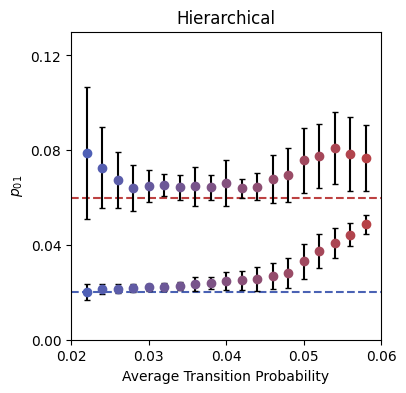

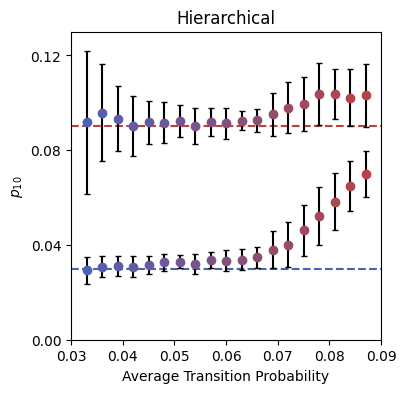

In [11]:
#HFRET p01/p10 FOR STATIC
plt.figure(figsize=(4,4))
plt.axhline(y = 0.06, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.02, ls = '--',color ='#4a62b4ff')

for j in res_h_s2prop.keys():
    plt.errorbar(x = 0.02 + j*0.04, y = np.mean(p01_1[j]), yerr = np.std(p01_1[j]),
                 fmt='o', color = newcmp(j), ecolor = 'k', capsize = 2)
    plt.errorbar(x = 0.02 + j*0.04, y = np.mean(p01_2[j]), yerr = np.std(p01_2[j]),
                 fmt='o', color = newcmp(j), ecolor = 'k', capsize = 2)
plt.title('Hierarchical')
plt.xlabel('Average Transition Probability')
plt.ylabel('$p_{01}$')
plt.xticks(np.arange(0.02, 0.07, step=0.01))
plt.xlim(0.02,0.06)
plt.yticks(np.arange(0.00, 0.13, step=0.04))
plt.ylim(0,.13)
plt.savefig('Figures/static/hfret_p01.pdf')

plt.figure(figsize=(4,4))
plt.axhline(y = 0.09, ls = '--',color ='#bd4141ff')
plt.axhline(y = 0.03, ls = '--',color ='#4a62b4ff')

for j in res_h_s2prop.keys():
    plt.errorbar(x = 0.03 + j*0.06, y = np.mean(p10_1[j]), yerr = np.std(p10_1[j]),
                 fmt='o', color = newcmp(j), ecolor = 'k', capsize = 2)
    plt.errorbar(x = 0.03 + j*0.06, y = np.mean(p10_2[j]), yerr = np.std(p10_2[j]),
                 fmt='o', color = newcmp(j), ecolor = 'k', capsize = 2)
plt.title('Hierarchical')
plt.xlabel('Average Transition Probability')
plt.ylabel('$p_{10}$')
plt.xticks(np.arange(0.03, 0.10, step=0.01))
plt.xlim(0.03,0.09)
plt.yticks(np.arange(0.00, 0.13, step=0.04))
plt.ylim(0,.13)
plt.savefig('Figures/static/hfret_p10.pdf')

In [12]:
#calculate steady state
def calcss(tm):
    w,vs = np.linalg.eig(tm.T)
    wi = np.argmax(w) ## w[wi] = 1.
    assert np.isclose(w[wi],1.)
    v = vs[:,wi]
    v /= v.sum() ## eig makes normalized to norm=1; make prob vector by div by sum
    return v

In [21]:
import scipy

psf = {}
pfs = {}

for resk in res_h_s2prop.keys():
    psf[resk] = []
    pfs[resk] = []
    
    for ress in res_h_s2prop[resk]:
        h_tm = ress.h_tm
        exit = ress.h_exit
        pi = ress.h_pi
        flat_tm = gen_flat_tm(h_tm, exit, pi, 'full')
        
        #getting required terms
        A_2_01, E_3_0, E_3_1, E_2_0, pi_2_1 = gen_flat_tm(h_tm, exit, pi, 'psf')
        A_2_10, E_3_2, E_3_3, E_2_1, pi_2_0 = gen_flat_tm(h_tm, exit, pi, 'pfs')
        
        #plotting all possible psf/pfs
        ss = calcss(flat_tm)
        psf[resk].append((ss[0] * E_3_0 + ss[1] * E_3_1) / (ss[0]+ss[1]) * A_2_01)
        pfs[resk].append((ss[2] * E_3_2 + ss[3] * E_3_3) / (ss[2]+ss[3]) * A_2_10)       
        

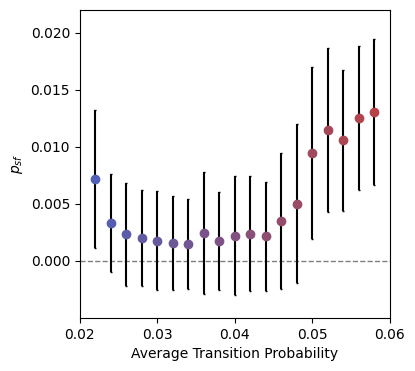

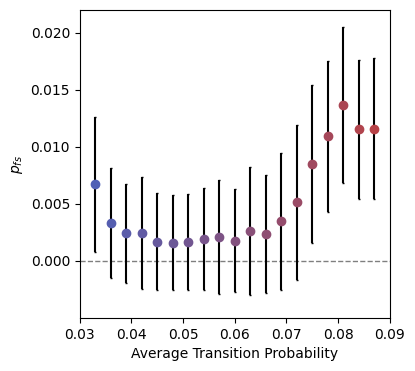

In [24]:
#plotting psf, pfs
plt.figure(figsize=(4,4))
for j in res_h_s2prop.keys():
    plt.errorbar(x = 0.02 + j*0.04, y = np.mean(psf[j]), yerr = np.std(psf[j]),
                 fmt='o', color = newcmp(j), ecolor = 'k', capsize = 1)
plt.axhline(y = 0.00, ls = '--',color ='k',alpha = 0.5, lw = 1)
plt.xticks(np.arange(0.02, 0.07, step=0.01))
plt.xlim(0.02,0.06)
plt.yticks(np.arange(0.0,0.030, step=0.005))
plt.ylim(-0.005,0.022)
plt.xlabel('Average Transition Probability')
plt.ylabel('$p_{sf}$')
plt.savefig('Figures/static_psf.pdf')

plt.figure(figsize=(4,4))
for j in res_h_s2prop.keys():
    plt.errorbar(x = 0.03 + j*0.06, y = np.mean(pfs[j]), yerr = np.std(pfs[j]),
                 fmt='o', color = newcmp(j), ecolor = 'k', capsize = 1)
plt.axhline(y = 0.00, ls = '--',color ='k',alpha = 0.5, lw = 1)

plt.xticks(np.arange(0.03, 0.10, step=0.01))
plt.xlim(0.03,0.09)
plt.yticks(np.arange(0.0,0.030, step=0.005))
plt.ylim(-0.005,0.022)
plt.xlabel('Average Transition Probability')
plt.ylabel('$p_{fs}$')
plt.savefig('Figures/static_pfs.pdf')
